<a href="https://colab.research.google.com/github/chamini123/Python-Assignment2/blob/main/CS_2016_010_House_SalePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 02**
### **DSCI 44012 - Python for Data Science**
### **CS/2016/010** 
### M. C. R. Fernando










---



# **Predict  House Sales Price**






---



---



**Import libraries**

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')

## **Dataset details**

**Load data**

In [236]:
# Load data
train_data = pd.read_csv('Data/train.csv', index_col='Id')
test_data = pd.read_csv('Data/test.csv', index_col='Id')


In [237]:
train_data.describe(include='all')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [238]:
test_data.describe(include='all')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [239]:
# Seperate features and target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data.SalePrice

In [240]:
# Concatenate train and test data
X = pd.concat([X_train, test_data], axis=0)

**Describe data**

In [241]:
print("Train data's size: ", X_train.shape)
print("Test data's size: ", test_data.shape)

Train data's size:  (1460, 79)
Test data's size:  (1459, 79)


Find numerical and categorical variables

In [242]:
# Numerical features
numCols = list(X_train.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 36 numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [243]:
# Categorical features
catCols = list(X_train.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 43 categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



## **Exploratory Data Analysis**


### **i) Sale Price**

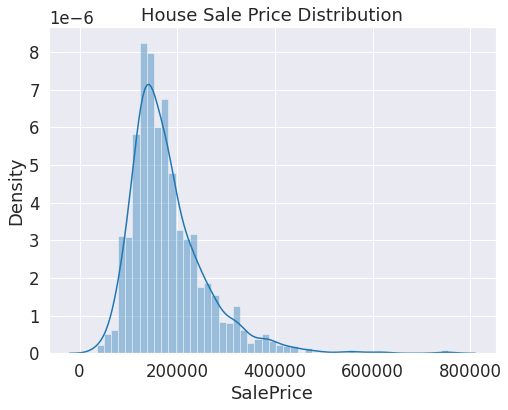

In [244]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Sale Price Distribution")

We can predict distribution of `SalePrice` is right-skewed. 

Now check its Skewness and Kurtosis statistics.

In [245]:
print(f"""Skewness: {y.skew()}
Kurtosis: {y.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529



### **ii) Numerical Features**

Top 10 numerical variables highly correlated with `SalePrice`:

In [246]:
corr_mat = train_data.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

According to above analysis, **Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built** are some of the most important features in determining house price.

**Overall Quality**

Overall quality is the most important feature when we perform above analysis. 

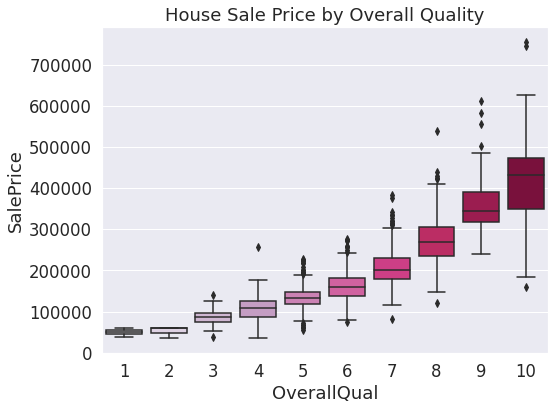

In [247]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='PuRd')
title = plt.title('House Sale Price by Overall Quality')

**Living Area**



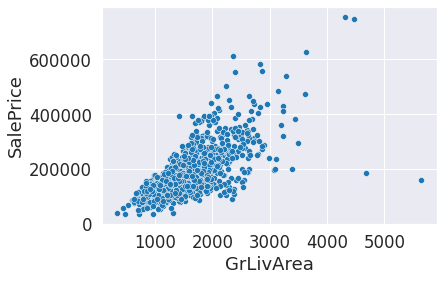

In [248]:
sns.scatterplot(y="SalePrice", x="GrLivArea", data=train_data)

From the above scatterplot we can see, Living area has a linear relationship with house price.

**Garage Size (Garage cars)**

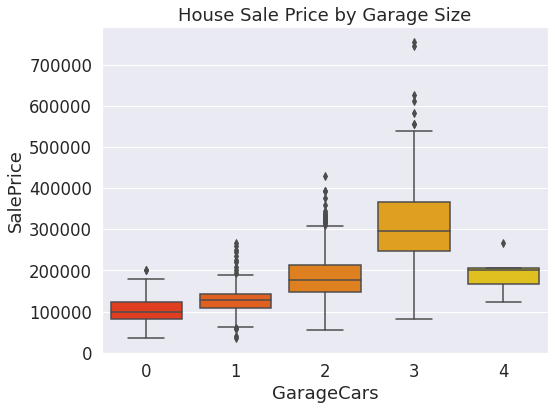

In [249]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data, palette='autumn')
title = plt.title('House Sale Price by Garage Size')



Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garage.

**Year Built**



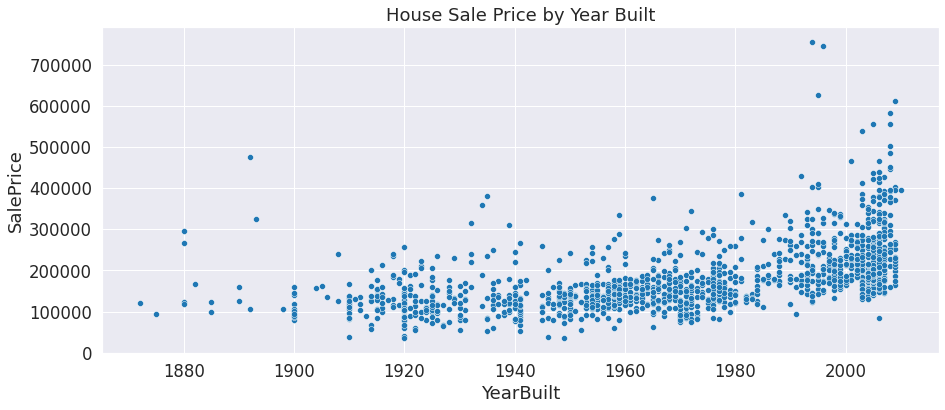

In [251]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Sale Price by Year Built')

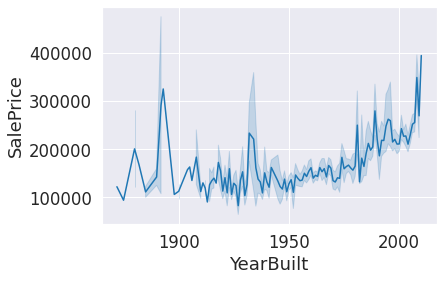

In [252]:
sns.lineplot(y='SalePrice',x='YearBuilt',data=train_data)


The age of the house also plays an important role in its price. Newer houses have higher average prices. We can see that, there are several houses built before 1900 having a high price.


### **iii) Categorical Variables**

Visualize the relationship between `SalePrice` and some of categorical features using box plots

In [253]:
sigCatCols = [
    'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC'
]

Let's explore some of them.

In [ ]:
def visualizeCateFeature(feature):
    # Descending order of levels sorted by median SalePrice
    featOrder = train_data.groupby(
        [feature]).median().SalePrice.sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=feature,
                y='SalePrice',
                data=train_data,
                order=featOrder,
                palette='rainbow')

**Neighborhood**



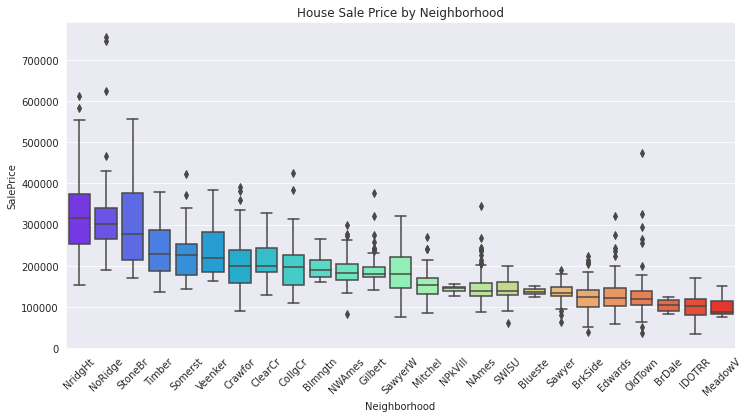

In [ ]:
plt.figure(figsize=(12, 6))
visualizeCateFeature('Neighborhood')
title = plt.title('House Sale Price by Neighborhood')
tick = plt.xticks(rotation=45)

There is a big difference in house prices among neighborhood. The top 3 expensive neighborhoods are **NridgHt, NoRidge and StoneBr** and the 3 cheapest neighborhoods, which are **BrDale, DOTRR and MeadowV**.

**Roof Material**



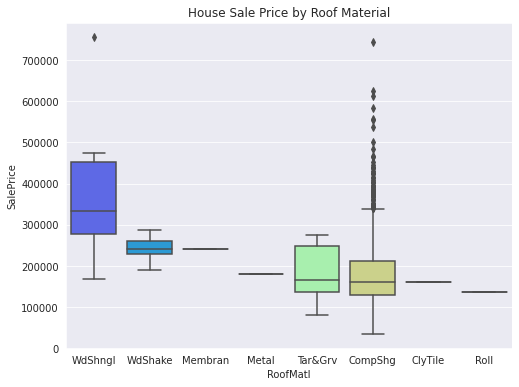

In [ ]:
plt.figure(figsize=(8, 6))
visualizeCateFeature('RoofMatl')
title = plt.title('House Sale Price by Roof Material')

Houses using **Wood Shingles roof** are the most expensive with price ranging from \\$280,000 to \\$450,000. There are also a lot of expensive houses using **Standard Composite Shingle roof**.

**Kitchen Quality**



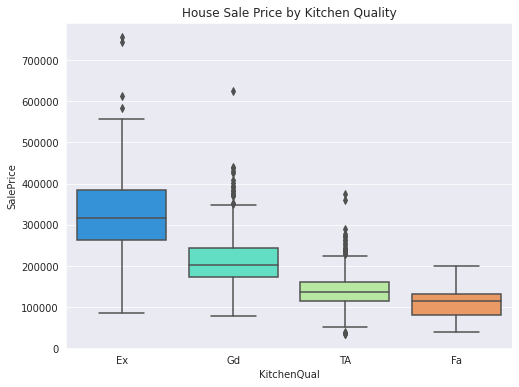

In [ ]:
plt.figure(figsize=(8, 6))
visualizeCateFeature('KitchenQual')
title = plt.title('House Sale Price by Kitchen Quality')

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality.

**Garage Quality**

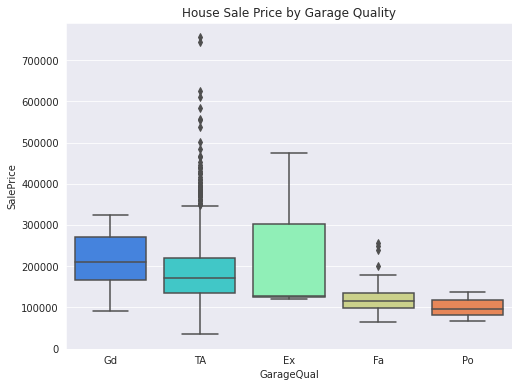

In [ ]:
plt.figure(figsize=(8, 6))
visualizeCateFeature('GarageQual')
title = plt.title('House Sale Price by Garage Quality')


### **iv) Correlations**

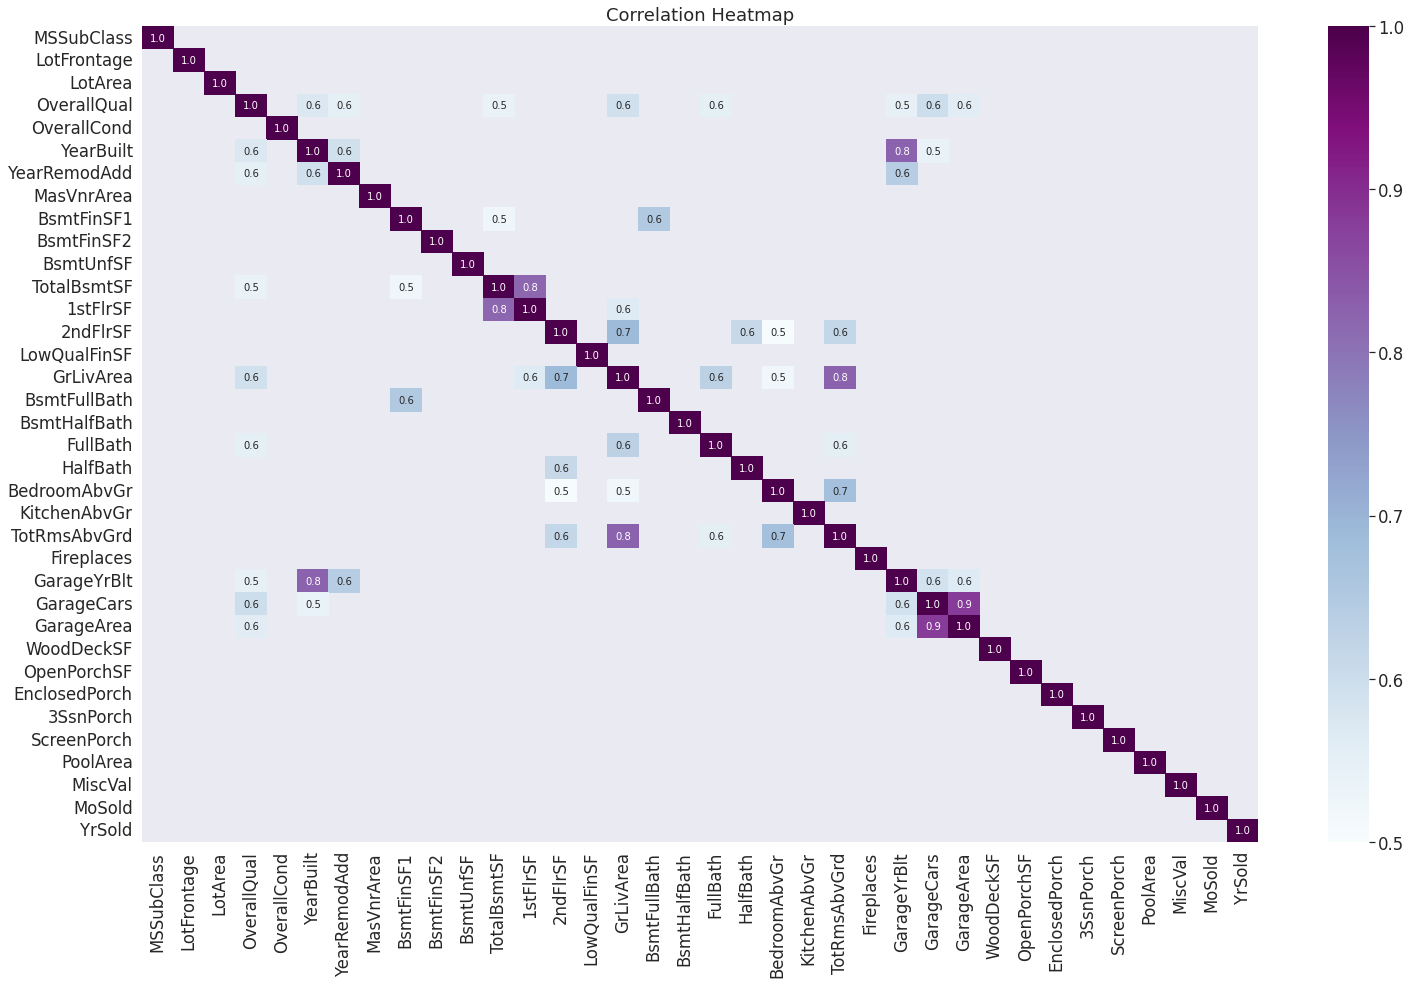

In [ ]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='BuPu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

There is multicollinearity in our training data. We can see that below features are highly correlated:
    - GarageCars and GarageArea
    - GarageYrBlt and YearBuilt
    - 1stFlrSF and TotalBsmtSF
    - GrLivArea and TotRmsAbvGrd
Multicolliniearity has a negative impact on our prediction models and makes standard errors of our estimates increase.`.


### **v) Checking Missing Values**

In [171]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 34 features having missing data.

Top 10 missing value features:


,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


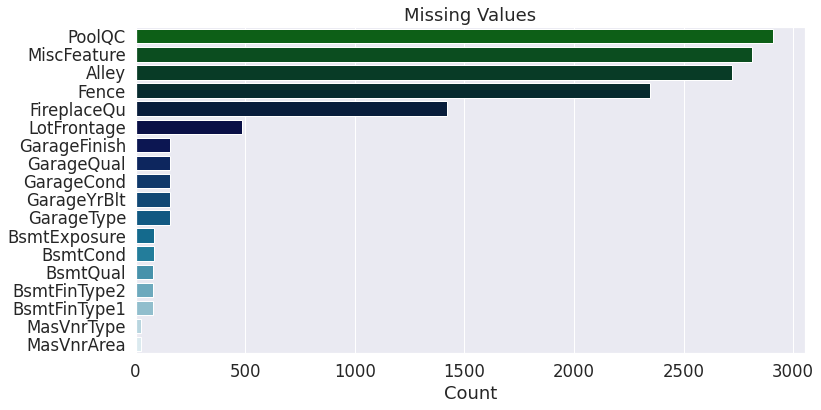

In [172]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(18).index,
            x=missing_data.head(18).Count,
            palette='ocean')
title = plt.title("Missing Values")

With some basic understandings of the data set and features, let's move to data preprocessing and modeling steps.

## **Data Preprocessing and Feature Engineering**

### **i)  Missing Values**

In [173]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [174]:
missing_data

,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


In [175]:
missing_data.head(10)

,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


There are 34 features that have missing values. 

Divide them into three groups based on the data description:

   - **Group 1 - Categorical variables where `NA` means no feature:** `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `MasVnrType` (15 variables)
   
    For this group, will impute `NA` with `'None'`.
    
   - **Group 2 - Numerical variables where `NA` means no feature:** `GarageArea`, `GarageCars`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, `BsmtHalfBath`, `MasVnrArea` (10 variables)
   
    For this group, will impute `NA` with `0`.
    
   - **Group 3 - Other variables:** `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities`, `LotFrontage`, `GarageYrBlt` (9 variables)
        - will impute `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities` with their *modes*,
        - impute `LotFrontage` with its *mean*,
        - impute `GarageYrBlt` with `YearBuilt`.

In [176]:
from sklearn.impute import SimpleImputer
# Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
X[group_1] = X[group_1].fillna("None")


In [177]:
# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

X[group_2] = X[group_2].fillna(0)


In [178]:
# Group 3:
group_3a = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
X[group_3a] = pd.DataFrame(imputer.fit_transform(X[group_3a]), index=X.index)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

Let's check whether there is any missing value left:

In [179]:
sum(X.isnull().sum())

0

All missing values have been handled.

### **ii) Outliers**

Because regression models are very sensitive to outlier, we need to be aware of them. Let's examine outliers with a scatter plot.

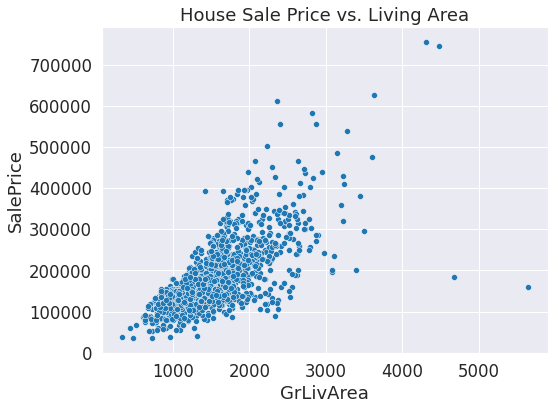

In [180]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('House Sale Price vs. Living Area')

There are two observations lying separately from the rest. They have large living area but low price. They are the outliers that we are looking for. delete them from the training set.

In [181]:
outlier_index = train_data[(train_data.GrLivArea > 4000)
                           & (train_data.SalePrice < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)



---



### **iii) Feature Engineering**

#### 1.Create New Variables




In this step create new features from weaker features in the training data. 
For example, the surface area of each floor has low correlation with house price; however, when we sum them up, the relationship becomes much stronger. In fact, `TotalSqFeet` becomes the strongest feature in the dataset. 

The new features, I'll create **total square feet, total number of bathrooms, age of the house, whether the house was remodeled, and whether the house was sold in the same year it was built.**

In [182]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
X['houseAge'] = X.YrSold - X.YearBuilt
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

#### 2. Label Encoding

Ordinal categorical features are label encoded.

In [183]:
from sklearn.preprocessing import LabelEncoder

# Ordinal categorical columns
label_encoding_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

#### 3. Transform Numerical Variables to Categorical Variables

Because I have calculated age of houses, `YearBuilt` is no longer needed. However, `YrSold` could have a large impact on house price (e.g. In economic crisis years, house price could be lower). Therefore, it will transform it into categorical variables.

Like `YrSold`, some numerical variables don't have any ordinal meaning (e.g. `MoSold`, `MSSubClass`). Transform them into categorical variables.

In [184]:
to_factor_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_factor_cols:
    X[col] = X[col].apply(str)

### **iv) Skewness and Normalizing Variables**

**Target variable**

In [131]:
from scipy import stats
from scipy.stats import norm

In [185]:
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

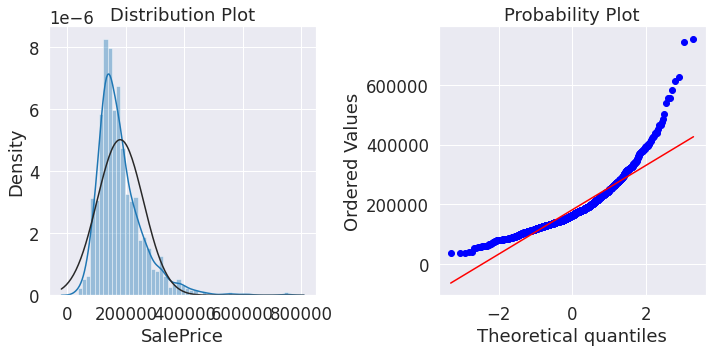

In [186]:
normality_plot(y)

One of the methods to normalize right-skewed data is using log transformation because big values will be pulled to the center. However, log(0) is Nan, so I will use log(1+X) to fix skewness instead.

In [187]:
y = np.log(1 + y)

And this is `SalePrice` after log transformation. The sknewness has been fixed.

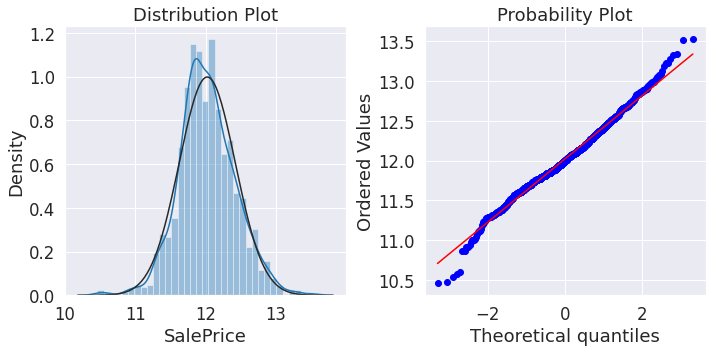

In [188]:
normality_plot(y)

In the next step I will examine skewness in the rest of numerical variables and use log transformation to fix them,

**Fixing skewness in other numerical variables**


Below are skewed features in our original train data.

In [189]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

Let's check normality of `GrLivArea`:

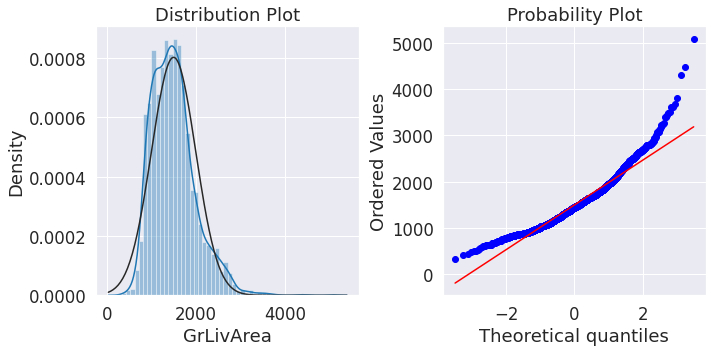

In [190]:
normality_plot(X.GrLivArea)

In [191]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    X[col] = np.log(1 + X[col])

Below is normality of `GrLivArea` after log-transformation. Skewness has been fixed.

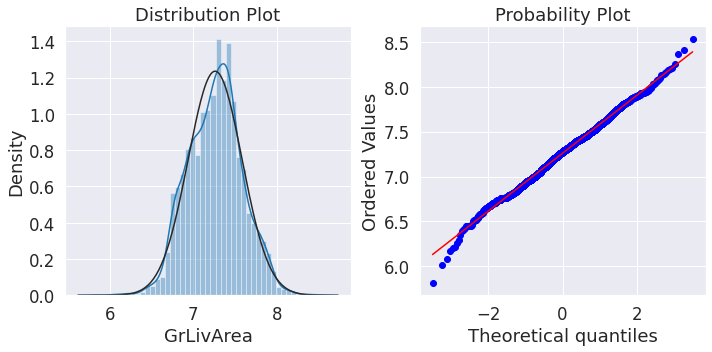

In [192]:
normality_plot(X.GrLivArea)

### **v) Feature Scaling**

In [193]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### **vi) One-hot Encoding**

In [194]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2917, 237)


After preprocessing the train and test data, split them again to perform modeling.

In [195]:
ntest = len(test_data)
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1458, 237)
X_test.shape: (1459, 237)




---



## **Modeling**

In [196]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

# function to get the Root Mean Squared Logarithmic Error (RMSLE) for my models using cross-validation
def getRMSLE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmse = np.sqrt(-cross_val_score(
        model, X_train, y, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()

### **i) Regularized Regressions**

In [197]:
from sklearn.linear_model import Ridge, Lasso

#### 1. Ridge Regression

Best lambda: 22.9
RMSLE: 0.11409306668450885


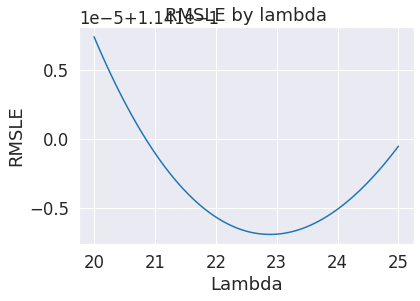

In [198]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

In [199]:
ridge = Ridge(alpha=22.9)

#### 2. Lasso Regression

Best lambda: 0.00065
RMSLE: 0.1133570157806129


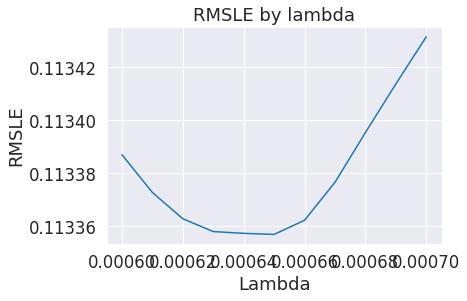

In [200]:
lambda_list = list(np.linspace(0.0006, 0.0007, 11))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [201]:
lasso = Lasso(alpha=0.00065, max_iter=100000)


### **ii) XGBoost**


With the parameter tuning for XGBoost, respectively tune and find the best parameter for  `n_estimators` `max_depth` `min_child_weight` `gamma` `subsample` `colsample_bytree` `reg_alpha` `reg_lambda` `learning_rate`.

In [202]:
from xgboost import XGBRegressor

In [208]:
xgb = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   silent=1,
                   random_state=7,
                   n_jobs=2)

In [209]:
getRMSLE(xgb)

0.11799856700856862

### **iii) LightGBM**

LightGBM is a powerful gradient boosting framework based on decision tree algorithm. Like XGBoost, LightGBM has a high performance on large data sets  but much faster training speed than XGBoost does. Tuned the parameters `num_leaves` `min_data_in_leaf` `max_depth` `bagging_fraction` `feature_fraction` `max_bin`.

In [210]:
from lightgbm import LGBMRegressor

In [211]:
lgb = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=730,
                    num_leaves=8,
                    min_data_in_leaf=4,
                    max_depth=3,
                    max_bin=55,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                    feature_fraction_seed=9,
                    bagging_seed=9,
                    min_sum_hessian_in_leaf=11)


In [212]:
getRMSLE(lgb)

0.11502519784230872

### **iv) Averaging Model**

Regularized regression and gradient boosting work very differently and they may perform well on different data points. Thus it is a good practice to get average predictions from these models. Below create a new class for averaging model.

In [213]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [214]:
avg_model = AveragingModel(models=(ridge, lasso, xgb, lgb))
getRMSLE(avg_model)

0.11106525046063447

The RMSLE score of the averaging model is much better than any of base models. I'll use this model as the final model. In the last step, I'll train the final model on the whole training data, make predictions from the test data and save my output.

In [233]:
my_model = avg_model
my_model.fit(X_train, y)
predictions = my_model.predict(X_test)
fout_predictions =  np.exp(predictions) - 1
final_predictions = np.round(fout_predictions, decimals=2)
output = pd.DataFrame({'Id': test_data.index, 'SalePrice':final_predictions})

##### **Create Submission File**

In [234]:
output.to_csv('SalePrice_submission.csv', index=False)
output.head()

,Id,SalePrice
0,1461,119792.89
1,1462,158025.34
2,1463,183415.51
3,1464,197085.84
4,1465,193907.13
